# DSCI 521: Methods for analysis and interpretation <br> Chapter 5: Data transformation, and analysis of functions

## 5.0 Functions
We've talked about functions a bit already in __Chapter 0.__, though this was in the context of computation! The basic interaction of a computing function is intuitively well linked to the mathematical concept, as it is common with a computing function to provide some input to recieve some output. The formal definition for a mathematical function is basically this, but requires a bit more precision from computing, as a function in computing is just a piece of code that, e.g., may complete some computing task and produce no output. Really, a computing function is about reuse of code. This is an excellent framework to complete the same or similar calculations abstractly, which is what mathematical functions often do. So, here's a formal definition for a mathematical function:

> A function is a relationship between a set of inputs and a set of possible outputs where each input is related to exactly one output.

More than often, functions will be denoted symbolically by a letter like $f$, accept some input named $x$, and have output denoted by $f(x)$. As taught in primary mathematics, it is helpful to consider input-output collections of points: 

$$\{(x_1, f(x_1)),(x_2, f(x_2)), \cdots, (x_3, f(x_3))\}$$

visually, i.e., as a graph. We'll discuss graphing data and functions at length in the next chapter, but to motivate this type of visual analysis makes it easy to see different types of relationships, like linear (green) vs. non-linear (orange):

![Linear vs. non-linear functions](./img/linear_function_vs_nonlinear_function.png)

### 5.0.1 Linear functions
To make things concrete, let's talk about the most basic functions of real ($\mathbb{R}$) numbers&mdash;linear functions. Generally, a linear function, $f$, may be expressed by specifying two _parameters_ (fixed constants), often denoted by $m$ and $b$ and referred to as the _slope_ and _intercept_, respectively. Given a real number, $x$, the output, $f(x)$ is calculated as:

$$f(x) = mx + b$$

So, the slope $m$ multiples (scales) the input, which the intercept $b$ then offsets. 

#### 5.0.1.1 Defining a linear function.
For practice, let's construct a _computational_ function called `linear()` that accepts three values: the input, `x`, on which to operate, and slope and intercept parameters, $m$ and $b$ in a list called `c`, i.e., `c = [b, m]`: 

In [1]:
def linear(x, c = [1,2]):
    return(c[1]*x + c[0])

Now, if we wanted to compute values along the line which 1) doubles values and then 2) subtracts 1, we can easily over a range of numbers:

In [2]:
from pprint import pprint
print("input values: ")
pprint(list(range(10)))
print("output values: ")
pprint([linear(x, [2, -1]) for x in range(10)])

input values: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output values: 
[2, 1, 0, -1, -2, -3, -4, -5, -6, -7]


### 5.0.2 Linear functions of higher dimensionality
Linear functions can interact with multiple dimensions/columns of input/data, too, and perhaps unsurprisingly linear algebra (introduced in __Chapter 1__) is a real piece of this picture! For example, a linear function $g$ might operate on three real dimensions, $x, y, z\in \mathbb{R}$. For this, the defining aspect as a linear will once again be multiplication and addition by constants. While we again need only one intercept, $b$, there'll be one separate slope/multiplier for each dimension: $m_x, m_y, m_z$. These are then composed in a similar way:

$$g(x,y,z) = m_xx + m_yy + m_zz + b$$

So, functions can in general have multiple inputs (a vector), while pointing to only a single output value (a number). More complicated scenarios certainly exist, e.g., when a function's output is a vector too. However, for the depth of our discussion and this course it will be sufficient to keep this dimensional complexity of functions to multiple inputs, like $g$.

#### 5.0.2.1 Exercise: defining a function of multiple data dimensions
In the manner of __Sec. 5.0.1.1__, re-define `linear` as a general linear function (like $g(x,y,z)$ in __5.0.2__) that 1) accepts a vector (array) of inputs, a vector of slopes, and an intercept; 2) checks to make sure there are as many inputs as there are slopes; and 3) computes the linear result.

In [3]:
# code here

### 5.0.2 Non-linear functions
Linear functions are easy to define and interpret, only relying upon basic multiplication and addition and producing graphs as simple as straight lines, planes, and cubes, etcetera. However, a great many more functions are non-linear, and these things can get complicated fast. Let's look at a few types here and discuss.

#### 5.0.2.1 Polynomials
Perhaps the most basic types of non-linear functions are called _polynomials_, which turn out to subsume the class of linear functions. Polynomials layer on complexity from linear function by allowing for exponentiation (self-multiplication) of input values by positive integers. As with linear functions, there's an intercept, $b$, but the multiplying constants (generalizing slope) scale the different powers. Thus, it turns out to be very important to define the concept of polynomial _degree_, $n$, which refers to the largest power of the input $x$ multipled by a non-zero constant. So, for a polynomial, $f$, of degree $n$ operating on a single variable/dimension of data, we must have $n$ multiplying constants, referred to as _coefficients_: $c_1, c_2, \cdots, c_n$, in addition to an intercept $c_0$ (i.e., $b$) that still offsets the mutiplied result:

$$f(x) = c_nx^n + c_{n+1}x^{n+1} + \cdots + c_1x + c_0$$

Note that it makes sense to call $b$ $c_0$&mdash;just another coefficient&mdash;since $b$ multiples the only exponentiation of $x$ guarenteed to be a constant, i.e., $b = bx^0$, since $x^0 = 1$.

#### 5.0.2.2 Exercise: defining a general polynomial
The task here again is to generalize the function `linear` from __Sec. 5.0.1.1__, but now differently, as a polynomial of a single dimension. This new function should be called `poly` and accept a single input $x$ on which to perform the polynomial calculation, a vector (array) of coefficients $c$, and an intercept. The function should then 1) determine the degree of the polynomial from the number of coefficients (assumed to be in a fixed order, i.e., low to high), and 2) compute the polynomial output value.

In [4]:
## code here

#### 5.0.3 Polynomials of multiple dimensions
Once we bring multiple dimensions into the definition of polynomial we're immediately faced with enumerative concerns over how the various dimensions of data are multipled together. Supposing again we have three real inputs: $x, y, z\in\mathbb{R}$, we now have to be concerned over terms like $x^2yz^4$, which brings together $x$ in degree $2$, $y$ in degree 1, and $z$ in degree $7$. However, the degree of the entire term is the sum of these: $7 = 2 + 1 + 4$. This means the degree of a polynomial of multiple dimensions now refers to the largest sum of powers of any term. Given a degree, there must now be a coefficient for each combination of powers of the inputs that sum to less than or equal to the degree. So, how many coefficients would this be? This involves a lot of counting, specifically using tools from a mathematical topic referred to _combinatorics_, which we'll discuss a bit in __Chapter 6__ when introducing probability. 

#### 5.0.3.1 Challenge exercise: defining a general polynomial of multiple dimensions
To define a general polynomial of multiple dimensions, we'll specify only the non-zero coefficients for specific terms. To complete this exercise, have your function accept 1) a vector of input values and a 2) dictionary of coefficients such that each key is a tuple referring to the relevant powers of inputs and each value is the corresponding coefficient. The function should be called `multi_poly` and output the real-valued result. So for the relatively sparse (degree-7) polynomial:

$$h(x,y,z) = 3x^2yz^4 +  8xy^2z^3 + 2yz^4 + 7x^2y +5$$

the parameter-setting dictionary required as a second argument would be:
```
{
    (2,1,4): 3,
    (1,2,3): 8,
    (0,1,4): 2,
    (2,1,0): 7,
    (0,0,0): 5
}
```

In [5]:
# code here

### 5.0.3 Exponential functions
An exponential function is a function of the form:
$$f(x) = a^x; a \gt 0.$$

Common values for the _base_, $a$, are $2$, $e$, and $10$. Exponential functions tells us what the powers of $a$ are. The intuition is generally that a small change in x will result in a _very_ large change in $f$. Since it's hard to do powers of a base in your head, it's often easiest to stick with the base $a = 10$, which comports with our _decimal_ number system. One of the big reasons why exponentials are so useful to us is because of the ways they let us handle data. These exponential rules are really mathematical "tricks" that let us cheat our way through computations. 

#### 5.0.3.1 Rules for exponential functions
The two primary rules are the _multiplication-to-addition_ rule:

$$a^xa^y = a^{x+y}$$

which allows one to replace a difficult multiplication with addition in the exponent, and the the _power-to-multiplication_ rule:
$$(a^x)^c = a^{cx}$$

which allows one to replace a difficult exponentiation with a multiplication in the exponent. One special, but perhaps non-obvious fact about exponentials is the following identity:
$$a^0 = 1,\text{ for any } a \gt 0.$$

#### 5.0.3.2 Computing exponential functions
Another reason why exponentials are so important is that a lot of data exhibit exponential variation, like earthquakes and the changing sizes of hard drives. However (as we'll see) it's their complimentary functions, logarithms, that will make it easy to work with expontial data. Exponential functions are quite easy to work with by using the math module's function `math.power(a,x)`:

In [6]:
import math

## find the exponential value (base 10) of a number
print(math.pow(10, 4))

10000.0


However, lots of times we'll want to take the exponential of a batch of numbers, say, in a list, which is where numpy comes in handy. Here's how to do a base-10 exponential to a list of numbers using `numpy.power(x, a)`:


In [7]:
import numpy as np

## perform exponentiation base 10 on a list of numbers
print(np.power([0.1, 2, 10, 5 ], 10))

[1.000000e-10 1.024000e+03 1.000000e+10 9.765625e+06]


#### 5.0.3.3 Exercise: defining the logistic function
The [_logistic function_](https://en.wikipedia.org/wiki/Logistic_function) is a special mathematical function based on the exponential function that is used widely in neural network applications. It's a common "S" shape (sigmoid curve), with equation:

$$f(x)= \frac {L}{1+e^{-k(x-x_{0})}},$$

where

- $x_0$ = the x-value of the function's midpoint,
- $L$ = the function's maximum value, and
- $k$ = the steepness of the 's'.

Your job here is to create a (computational) implementation of the logistic function, `logistic(x, k)`, accepting a values for $x$ and the above parameters, but with presets: $k = 1$, $L=1$, and $x_0 = 0$.

In [8]:
## place code here

### 5.0.4 Logarithmic Functions

The other side of the exponential coin is the _logarithm_. With many types of data exhibiting exponential variation, it's very helpful to be able to undo exponential functions. Logarithms answer the question: "To get $x$, what is the exponent I would have to raise the base $a$ to?" Thus, just like an exponent requires specifying a base, so does a logarithm:

$$f(x) = \log_a(x); a\gt0, a\neq 1,$$

Note that $a$ cannot be 1! The exremely important relationship between exponentials and logarithms is that they undo each other:

$$a^{\log_a{(x)}} = \log_a{\left(a^x\right)} = x$$

#### 5.0.4.1 Rules for logarithmic functions
Like exponentials, logarithms have their own (reverse) versions of the two rules. For logarithms, the _multiplication-to-addition_ rule:
$$\log_a{(xy)} = \log_a{(x)} + \log_a{(y)}$$

lets you break down a difficult product into a sum of logarithms, while the _power-to-multiplication_ rule:

$$\log_a{\left(x^c\right)} = c\log_a{(x)}$$

lets you avoid taking an exponent by doing a multiplication outside of the logarithm, instead. This last rule and the exponential-logarithm undo property let us see something else that's important:

$$ x = a^{\log_a{(x)}} = \log_a{\left(a^x\right)} = x\log_a{(a)} \Rightarrow \log_a{(a)} = 1$$

Finally, if we combine our special exponential identity with our logarithm rules, we get one more special identity:

$$\log_a{(1)} = \log_a{\left(a^0\right)} = 0\log_a{(a)} = 0,\text{ for any } a \gt 0, a\neq1.$$

#### 5.0.4.2 Computing logarithmic functions
Taking arbitrary-base logarithms is also quite easy with the math module's function, `math.log(a,x)`:

In [9]:
## take the logarithm base 10 of a list of numbers
math.log(10, 0.1)

-1.0000000000000002

#### 5.0.4.3 Changing logarithmic bases
While it's once again extremely helpful to be able to perform a logarithm on a list of numbers—and `NumPy` can do this—there is no built-in way to take an arbitrary-base logarithm of a list of numbers. This is probably because changing a logarithm's base is as simple as multiplying by a constant:

$$\log_b{(x)} = \frac{1}{\log_a{(b)}}\log_a{(x)}$$

This makes it easy to use numpy's base-ten logarithm function: `np.log10(x)`, for just about anything we want:


In [10]:
##  find the log base 10 of a list of numbers
print(np.log10([0.1, 2, 10, 5 ]), '\n')

## find the log base 7 of a list of numbers
print(np.log10([0.1, 2, 10, 5 ]) / np.log10(7))

[-1.       0.30103  1.       0.69897] 

[-1.18329466  0.35620719  1.18329466  0.82708748]


### 5.0.5 Transcendental functions for data handling
Transcendental functions&mdash;derived from logarithms/exponentiaton, mostly&mdash;are one of those math topics that often get tossed into a calculus course even though they are not specifically about calculus. Why? Because they are _really_ useful. They're really just an advanced algebra topic that require re-iteration and emphasis. So, just like in calculus we'll put our conversation about logarithms here. In fact, we'll get deeper into logarithms and use them more often on a day-to-day basis than any calculus concepts. Why? Because they give us _really_ useful tricks for handling data and performing computations.

#### 5.0.5.1 Using logarithms to perform problematic computations

It's not an uncommon scenario in data science to have to multiply a _bunch_ of numbers together. Computers aren't perfect, and one of the things they have a hard time with is multiplication. However, it's much easier for a computer to do addition well. This makes logarithms/exponentials a big win! __The important thing to understand is that logarithms turn a multiplication job into an addition job, and can then be undone by an exponentiation__. So, supposing you have to multiply a bunch—$n$—of numbers, $[p_1, p_2, \cdots, p_n]$, together:

$$x = \prod_{i=1}^np_i = p_1*p_2*\cdots*p_n,$$

doing this directly would probably cause Python to come up with the wrong answer, or break entirely. Instead, we could simply find the logarithm of $x$:

$$\log_a{(x)} = \log_a{\left(\prod_{i=1}^np_i\right)} = \log_a{(p_1*p_2*\cdots*p_n)},$$

and use our awesome multiplication-to-addition rule:

$$\log_a{(p_1*p_2*\cdots*p_n)} = \log_a{(p_1)} + \log_a{(p_2)} + \cdots + \log_a{(p_n)} = \sum_{i=1}^n\log_a{(p_i)},$$

which Python would be _much_ more likely to succeed at. To find our answer, all we have to do is apply our friend, the exponential function, to un-logarithm our answer:

$$x = a^{\log_a{(x)}}.$$

Putting this together, we have a recipe for problematic computations:

1. Take logarithms of your data.
2. Perform computations by using logarithm rules.
3. Un-logarithm your result with an exponential function.

#### 5.0.5.2 Example: calculation through logarithmic transformation
Here's this process in an example. Suppose we want to take the geometric mean (we'll discuss what this _average_ is a bit more in __Chapter 5__) of the first 1000 numbers:
$$\overline{x}_g = \sqrt[1000]{\prod_{i=1}^{1000}i}$$

In [11]:
## make some data that we want to multiply, but can't
nums = range(1, 1001)

## let's see what happens when we try and multiply the
## first 1000 integers together as floats
## note: by starting x out as a float, all subsequent
## operations will result in a float.
## if we had done this with integers, 
## Python would use its arbitrary precision,
## which is only limited by machine memory
x = 1.

## loop over the integers
for num in nums:
    ## multiply the result by the current integer
    x *= num

## take the 1000th root to complete the average
print(x ** (1 / 1000))

inf


Oh no! We got `inf`. Guess we need to use our recipe. Let's see if we can work this out, noting:

$$\log_{10}{(\overline{x}_g)} = \frac{1}{1000}\sum_{i=1}^{1000}\log_{10}{(i)}$$

In [12]:
## make some data that we want to multiply, 
## and take their logarithms
log_nums = np.log10(range(1, 1001))

## add  the logarithms up with sum()
sum_log_nums = sum(log_nums)
print(sum_log_nums, '\n')

## divide our log-sum by 1000 and 
## exponentiate base 10 to get a final answer 
print(10 ** (sum_log_nums / 1000.))

2567.6046442221304 

369.4916634719579


#### 5.0.5.3 Exercise: functionalizing products by logarithmic summation
Write a function called `safe_product()` that takes an arbitrary list of _positive_ numbers and computes their product by completing the sum of logarithms routine outlined above. If any of the numbers to be multiplied are zero, the function should detect this and just `return  0` immediately. For any of the numbers that are negative, they should be counted and negated before taking any logarithms. The final output should then `return product` if there were an even number of negative numbers, and `return -product` if there were an odd number.

In [13]:
## code here

#### 5.0.5.4 Example: using logarithms to space wild data out for visualization
Here's another wonderful property of logarithms and their ability to undo exponents. If data are distributed in an exponetial (as opposed to normal) way, it's quite difficult to make comparisons of data points and get a big picture. As an example, let's look at some bikeshare data and look at a histogram of the trip durations. Note: this example utilizes logarithms to improve visualization, which is covered in detail in __Chapter 3__.

Number of trips:  276785


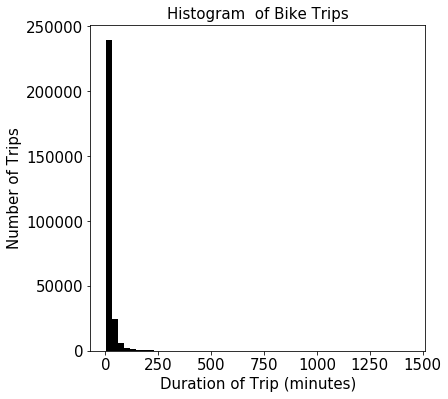

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as  pd

bike_data = pd.read_csv("./data/indego-trips-2017-q3.csv", parse_dates = [0])

print("Number of trips: ", len(bike_data))

fig = plt.figure(figsize = (6,6))

_ = plt.hist(bike_data["duration"], bins = 50, color = "black")

_ = plt.ylabel("Number of Trips", fontsize = 15)

_ = plt.xlabel("Duration of Trip (minutes)", fontsize = 15)

_ = plt.title("Histogram  of Bike Trips", fontsize = 15)

plt.tick_params(labelsize = 15)

So, where's all the data? Even though there were nearly 300k bike trips, it's hard to see any variation. Just about all of the trips appear to be short, while a few must have been long—up to 1,500 minutes. But how many trips were this long relative to the number of short trips? This is where a logarithmic scale comes in super handy. A _logarithmic scale_ shows us logarithm-transformed data, which spaces wild, potentially exponential values out. Let's start by taking the logarithm of the y-axis variables. Matplotlib has a built-in function for this. Note: it's customary to view a logarithmic scale with base 10.

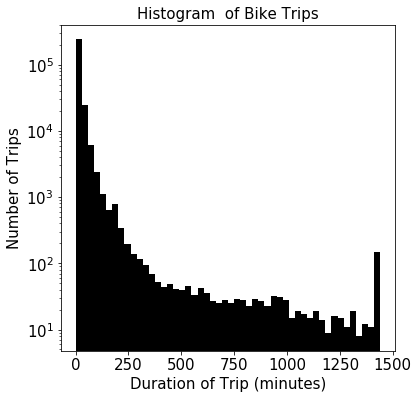

In [15]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(bike_data["duration"], bins = 50, color = "black")

_ = plt.ylabel("Number of Trips", fontsize = 15)

_ = plt.xlabel("Duration of Trip (minutes)", fontsize = 15)

_ = plt.title("Histogram  of Bike Trips", fontsize = 15)

plt.tick_params(labelsize = 15)

_ = plt.yscale('log', nonposy = 'clip')

Now we can see a little bit of what's going on. With the logarithm of the y-axis taken we can see things like a spike, right at the largest durations. What's this about? Why are their so many trips at the end with such a long duration? (A day is $1,440$ minutes long). To dig in a little further, let's see what happens when we take the logarithm of the x-axis, too.

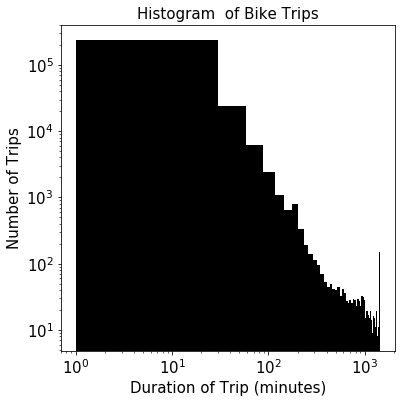

In [16]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(bike_data["duration"], bins = 50, color = "black")

_ = plt.ylabel("Number of Trips", fontsize = 15)

_ = plt.xlabel("Duration of Trip (minutes)", fontsize = 15)

_ = plt.title("Histogram  of Bike Trips", fontsize = 15)

plt.tick_params(labelsize = 15)

_ = plt.yscale('log', nonposy = 'clip')

_ = plt.xscale('log')

This histogram looks like a straight line! Transforming our data and getting back a straight line means something important. We won't get into the specifics of just what yet, but the important thing to understand is that there is now a very regular and identifiable paattern that we could not otherwise see. Basically, if our transformation of the data renders a straight line, we have effectively "undone" it's variation, and potentially uncovered a model for its formation. We'll come back to this another day.

## 5.1 Calculus
So, what is calculus and how important is it for data science? There's no doubt for the scientific value that calculus has provided since its formalization. Many of society's advances in physics and engineering would have been impossible without it. Consequently, in U.S. primary education it's not uncommon to receive the perception that calculus is the fancy math following algebra that all scientifically-minded students positively _must_ have in order to succeed in their fields. Thus, college curricula commonly require sequences of several courses in calculus for degree completion. So, naturally we might ask if such coursework holds similar benefit in data science?

### 5.1.1 Calculus is all about smoothness and analyzing theoretical models
There have indeed been many circumstances in which smooth, theoretical models applied to data resulted in a good course of action for data science work. But this doesn't mean their applied work amounted to any deep procedural execution of calculus thinking. That work was often done earlier by researchers from more-theoretical fields like probability, statistics, mathematics, and machine learning. Thus, since data science is fundementally an empirical discipline, and so much of the work in simply managing, structuring, and handling data, it is quite rare that a data scientist will have to actually do any real calculus work. This being said, it _is_ important to have some basic understanding of when and why calculus is used.

In general, there are two main flavors of calculus, focusing on two primary operations. Like many mathematical concepts, these are intrinsically complimentary, and in some sense "undo" each other. Let's explore these in turn.

### 5.1.2 Derivatives: rates

For a function $f(x)$, its _derivative_, $f'(x)$, is a function (itself) that describes the rate of change of the original function. This can be thought of as the slope of the (tangent) line touching $f$'s graph at $x$ without going through it. Since derivatives are zero when a function levels off, they're quite handy tools when you have to figure out the locations of maxima and minimia, i.e., in circumstances where optimization is required. So, the most common circumstance in which you'll see derivative calculus popping into data science is when someone is developing a machine learning algorithm. However, it's not an algorithm's definition that usually needs a derivative, but more commonly the development of a scheme for its optimizationm, i.e., finding its best version. To give you an intuition for what a derivative does, here's a good illustration of what the derivative of a function is:

![deriv](img/Sec2tan.gif)

Note: derivatives don't exist at any corners or sharp edges that a function might have.

#### 5.1.2.1 Calculating derivatives
As reviewed in the next section, derivatives are calculated analytically for standard function types using formulae. But where do these come from? A standard course in pre-calculus will build up to derivatives through discussion of _limits_, which analyze the output of a function as an input approaches a specified value. For the derivative of a function, we're actually interested in the _limit of slopes of secant lines_ between two inputs as the inputs get closer together. The slope of such a secant line through a function, $f$ at two inputs, $x$ and $x+h$ is simply the rise, i.e., change in output: $f(x + h) - f(x)$ divided by the run, i.e., change in input: $x + h - x = h$, where we'll always assume $h$ is a small positive number. Thus, the derivative of $f$ is approximated by the value of the _difference quotient_ for small values of $h$: 

$$f'(x)\approx\frac{f(x + h) - f(x)}{h}$$

As mentioned, some derivative rules are presented in the next section for completeness of review in this discussion. But as it turns out, the difference quotient approximation (above) is actually very important as it gives us a means to approximate derivatives for arbitrary functions! This is huge for our ability to optimize functions when derivatives are computationally expensive or analytically challenging to calculate. So, to round things out, let's write a `difference_quotient()` function that takes a function, `f`, point of evaluation `x`, and step size `h` as inputs to compute an approximate derivative:

In [17]:
def difference_quotient(f, x, h): 
    return (f(x + h)-f(x))/h

When implementing gradient descent (below) we'll look at the resulting differences between analytic and approximate calculations of derivatives. To try out our derivative approximation, we can create and pass a function of one dimension. What do you think the derivative's true value is?

In [18]:
def square(x, c = 1):
    return c*x**2

difference_quotient(square, 3, 0.001)

6.000999999999479

#### 5.1.2.2 Exercise: computing derivative approximations
Compute derivative approximations using `difference_quotient` for the `square` and `linear` functions (assuming default coefficients) for a number of different values of `x` and `h`. Do these approximations appear to change as these values are adjusted? How does `h` appear to affect the approximations at a _given_ value?

In [19]:
## code here

#### 5.1.2.3 Some derivative rules
As mentioned above, derivatives are generally calculated from known folmulae of basic functions, such as those discussed above. For completeness, we'll review these here. However, this doesn't mean that _computation_ generally proceeds by scratching out derivatives by hand. Sometimes, functions are not smooth, or nicely composed of such atomic values, which is why the `difference_quotient()` function above (rather a generalized version, below) will serve as a nice 'swiss army knife'. This being said, what follows can be thought of as a cheet sheet for basic differential calculus.

First an foremost, the derivative is a _linear operator_, meaning that the derivative of any _linear combination_ of functions can be computed as the _linear combination_ of the functions' derivatives:

$$f(x) = c_gg(x) + c_hh(x) \Longrightarrow f'(x) = c_gg'(x) + c_hh'(x)$$

Some folks will describe this in terms of two separate rules:

The __constant factor__ rule:
$$(af)'(x)=af'(x)$$

The __sum__ rule
$$(f+g)'(x)=f'(x)+g'(x)$$

Regardless, these are essential when calculating derivatives of more complex functions that are composed of other, simpler functions. Derivatives of the simpler, canoncial functions discussed at the beginning of this chapter are as follows:

The __elementary power (polynomial) rule__ states that If $f(x) = x^n$ for any $n\neq 0$, then

$$f'(x)=nx^{n-1}$$

As a special case, if $f(x) = x$, then $f′(x) = 1$. Combining this rule with the linearity of the derivative (its linear operator status) permits the computation of the derivative of any polynomial. This means our squaring function, $f(x) = x^2$ has derivative $f'(x) = 2x)$, making our approximation above by the difference quotient quite close to the true value of $f'(3) = 2\cdot3 = 6$!

The __product__ rule states that the derivative of the function $h(x) = f(x) g(x)$ with respect to $x$ is

$$h'(x)=(f(x)g(x))'=f'(x)g(x)+f(x)g'(x)$$

The __chain__ rule states that the derivatice of the function $h(x)=f(g(x))$ with respect to $x$ is

$$h'(x)=(f(g(x)))'=f'(g(x))g'(x)$$

This means that a __quotient__ rule for a derivative of a function $h(x) = f(x)/g(x)$ can be computed from a combination of the power, product, and chain rules, since:

$$h(x) = \frac{f(x)}{g(x)} = f(x)(g(x))^{-1}$$ 

In particular, one has:
$$
\begin{align}
h'(x) 
&= f'(x)g(x)^{-1} - f(x)g'(x){g(x)^-2}\\\\
&= \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}
\end{align}
$$

For our transcendental function the derivatives get a little bit stranger!
In particular, the __derivative of an exponential function__, $f(x) = c^{ax}$, with $\hspace{10pt} c>0$ is given by:

$$f'(x) = c^{ax}\ln c\cdot a$$

and for the __derivative of a logarithmic function__, $f(x) = \log _{c}x$, with $c>0,c\neq 1$ is given by:

$$f'(x) = \frac{1}{x\ln c}$$

#### 5.1.2.4 Exercise: Making sense of derivatives
Considering the two applications of the difference quotient in __Secs. 5.1.2.1&ndash;5.1.2.3__, make sense of their ouput. Do the derivative rules (above) suggest these approximations were accurate? Discuss!

_Response._

#### 5.1.2.5 Exercise: calculating logistic derivatives
Using the above derivative rules, show that the derivative of the _standard_ logistic function (i.e., with the presets requested in __Sec. 5.0.3.3__) has the following special property: 

$$f'(x) = f(x)(1 - f(x))$$

and use this property to define a (computing) function that calculates derivatives from the logistic function requested in __Sec. 5.0.3.3__.

_Response._

In [20]:
## code here

### 5.1.3 Integrals: accumulation
The "undo" operation for a function's derivative is called an _integral_. Integrals describe the accumulated area between a function, $f(x)$'s graph and the $x$-axis. Integrals are taken over specified ranges of $x$, like starting from $x=a$ and ending at $x=b$, indicated by a somewhat more complicated notation:

$$\int_a^bf(x)dx$$

This makes integrals handy tools in circumstances where you have to add things up. So, the common context in which integral calculus will pop into data science work is more commonly with probabilistic modeling. When one defines a (smooth) probability model, its total probability—the area under the model's curve—must add up to one. So, answering questions like "Where does my model predict 95% of the outcomes will be?" will often rely on the result of an integral. Mostly, we'll _use_ well-established distributions that have already had the integral calculus work done. Just like with derivatives, here's a good illustration of what the integral (denoted by $S$) of a function looks like:

![int](img/integral.jpg)

#### 5.1.3.1 Calculating integrals
Just like with derivatives, integrals are often defined and calculated from principles using limits. The easiest way to do this is to cover the region we'd like to measure the area of with rectangular tiles. This is called the _rectangle rule_. There're a few different rectangles we could choose, setting the tops at the left, right, or midpoint values of the function over the region where the rectangle is to be defined. Here's an excellent picture of these:

![Rectangle rule](./img/322_left_right_midpoint_rules.gif)

Here's a bit of code to approximate a function of one variable using the _left-endpoint_ rule with $n$ rectangles, testing on our `square()` function over a few different rectangle-wiidths. Can you see the approximations get more-refined with the rectangles?

In [21]:
def left_endpt_int(f, a, b, n):
    h = (b - a)/n
    lefts = np.array([a + h*k for k in range(n)])

    return(sum(h*f(lefts)))

print(left_endpt_int(square, -2, 2, 2))
print(left_endpt_int(square, -2, 2, 3))
print(left_endpt_int(square, -2, 2, 7))
print(left_endpt_int(square, -2, 2, 9))
print(left_endpt_int(square, -2, 2, 20))

8.0
6.518518518518518
5.551020408163264
5.465020576131687
5.360000000000002


It's worth noting that integral approximations can certainly get better than the above. For example, there's also the _trapezoid rule_. Intuitively, the top (or bottom, when $f(x) < 0$) will be a secant line through $f$'s values at each given trapezoid's left-right endpoints. Can you compute the area of each trapezoid to render integral approximations? It can be challenging! The picture looks like this:

![Trapezoid rule](./img/322_trapezoidal_rule.png)

#### 5.1.3.2 Analytic integrals

Computing integrals and derivatives are both challenging, but performing integral calculations in abstract can be much more difficult than derivatives! Integrals are linear operators:

$$\int cf(x) + dg(x)\:dx = c\int f(x)\:dx \: + \: d\int g(x)\:dx,$$

and (up to a constant), derivatives and integrals 'undo' each other, i.e.:

$$
\int f'(x)\:dx = f(x) + c
\hspace{10pt}\text{and}\hspace{10pt}
f'\left(\int f(x)\:dx\right) = f(x)
$$

Such as with derivatives, properties like these are very important for determining integrals analytically. For example, the integral of a polynomial of one dimension is generally known via the power rule for integrals:

$$\int x^n dx = \frac{x^{n+1}}{n+1} + c,$$

where $c$ is a constant. But where does the integral power rule formula come from? One way to see it reasons in a straightforward manner from knowledge of the derivative (power) rule:

$$
\begin{align}
& \hspace{5pt} f(x) = x^m \\
\Longrightarrow & \hspace{5pt} f'(x) = mx^{m-1} \\
\Longrightarrow & \int mx^{m-1}\: dx = f(x) + K = x^m + K \\
\Longrightarrow & \hspace{5pt}m\int x^{m-1}\: dx = \frac{x^{m}}{m} + \frac{K}{m}\\
\Longrightarrow & \int x^{n}\: dx = \frac{ x^{n+1} }{n+1} + c
\end{align}
$$

where in the last line this derivation defines $c = \frac{K}{m}$ and $n = m - 1$.

Integrals are like puzzles with often unclear pathways to resolving. Others require techniques that utilize some _very_ advanced mathematics. For those that are known analytically, there are generally large integral tables that record their complex, difficult to remember (or solve) formulae. Since we won't really need these too much in the course and those that are needed are commonly drawn from reference materials we won't go into depth here. However, the topic will come up again in __Chapter 6__, when we discuss probability.

### 5.1.3 Gradient descent and optimization
We will often need to maximize/minimize&mdash;optimize&mdash;functions that take as input a vector of real numbers and simply outputs a single real number. So, here we'll need to find the specific input(s) that produces the largest/smallest possible output values. But how do we compute derivatives of functions of more than one dimension? One way is to compute the rate of change that a function takes along its different input dimensions, separately. This concept is called the _gradient_ and helps out immensely with optimizations, as it can determine information on the input direction along which the function will most likely increase or decrease the most. 

We've actually already covered the gradient in the case when our function is just of a single variable&mdash;it's simply the derivative! However, when our function is one of several variables, it possesses multiple _partial derivatives_. Each partial derivative depicts how the function changes when small changes are made in just a single input variable. This is calculated by treating the function as just a function of the variable in question, and treating all the other variables as constants.

#### 5.1.3.1 Calculating gradients
The gradient of a function of multiple dimensions is _vector-valued_, which means that the output, i.e., gradient of a function, is a vector, itself, expressed in terms of the input variable dimensions. For a function of $n$ dimensions (i.e., columns of data), $f(x_1, \cdots, x_n)$, expressing the gradient of $f$ requires the determination of $n$ _partial_ derivatives&mdash;one with respect to each input variable. For notation, we'll refer to the derivative of a function $f$ with respect to variable $x_i$ as $f_{x_i}'$, and calculate it as though all other variables are constant. Denoting the gradient of $f(x_1, \cdots, x_n)$ by $\nabla f(x_1, \cdots, x_n)$, it may be calculated from partial derivatives as:

$$\nabla f(x_1, \cdots, x_n) = \left[\hspace{2pt}f_{x_1}'(x_1, \cdots, x_n),\hspace{22pt} \cdots,\hspace{22pt} f_{x_n}'(x_1, \cdots, x_n)\right]$$

that is, $\nabla f(x_1, \cdots, x_n)$ is itself a vector of functions of multiple dimensions.  

So, taking our relatively simple polynomial example:

$$ f(x, y, z) = x^2 + y^2 + z^2$$

the subsequent gradient would be

$$ 
\begin{align}
\nabla f(x, y, z)
&= \left[\hspace{2pt}f_{x}'(x, y, z),\hspace{22pt} f_{y}'(x, y, z),\hspace{22pt} f_{z}'(x, y, z)\right]\\
&= \left[2x,\hspace{46pt} 2y,\hspace{46pt} 2z\right]
\end{align}
$$

#### 5.1.3.2 Gradient descent
_Gradient descent_ is one particular (and relatively simple) algorithm often used for optimization. Well put in its [Wikipedia article](https://en.wikipedia.org/wiki/Gradient_descent):

> Gradient descent is also known as [the approach of] steepest descent.

As the Wikipedia article goes on:

> To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. 

Of course, the same can technique can be used in maximizing a function, albeit with taking steps in the direction along that suggested by the gradient.

So, to define gradient descent on a function $f$ we can:

1. pick a random starting input, $x^{(0)} = \left[x_1, \cdots, x_n\right]$; 
2. compute the gradient at $x$ and multiply by a small _negative_ constant: $\gamma\cdot\nabla f(x)$;
3. _pointwise_ add $\gamma\cdot\nabla f(x)$ to $x^{(0)}$ to step to the next point: $x^{(1)} = x^{(0)} + \gamma\cdot\nabla f(x)$
4. repeat, using $x^{(n)}$ as the start for the next step $x^{(n+1)}$.

Generally, the gradient descent algorithm is repeated until the values $x^{(n)}$ converge, i.e., stop changing appreciably. This is generally done by setting a _tolerance_. Once the change between points falls to within the desired tolerance, the algorithm will have _converged_. But, if the  $x^{(n)}$ are vectors, how do we compute the size of change between points? Well, from __Chapter 1__ we know that the Euclidean distance, i.e., the square root of the sum of squared errors (pointwise differences) does just this. 

Note that the small negative constant in this algorithm is called the _step size_, and if made positive changes te algorithm into _gradient ascent_, i.e., mountain climbing. The choice of framing is relatively arbitrary, as a function $f$ can be maximized by performing gradient descent on $-f(x)$. Additionally, the step size parameter can impact the ability for the algorithm to converge&mdash;as we're about tto discuss in __Sec. 5.1.3.4__, it can help to adjust this parameter dynamically.

Importantly that gradient descent is only ever guarenteed to find a _local_ minimum, i.e., that a well that may or may not be the _deepest_ well. This is, in general, a challenge in the study of optimization algorithms and the reason for the development of many others. However, gradient descent is a clear, intuitive starting potin as the approach of steepest descent and very widely used for its scalability, namely in neural network applications. Here's a good picture to have in mind for gradient descent, taking the simplest non-trivial case

![Gradient descent](./img/Gradient_descent.png)

#### 5.1.3.3 Implementing gradient descent
There are many methods provided in the numerical modules of `Python` that allow for easy computation of gradients, so it isn't totally necessary to know how to calculate them by hand. What is important is understanding the general concept of what a gradient is. Let's use the gradient to minimize the our simple example function once again:

$$f(x, y, z) = x^2 + y^2 + z^2$$

Since the value of any squared real number is positive, this function is minimized when our input is the point $(0, 0, 0)$, but let's show this using what we've just learned! To get things started, let's define our sum of squares function, $f$, as above:

In [22]:
def sum_of_squares(x):
    """Our sum of squares function, f at point x"""
    return sum([x_i**2 for x_i in x])

We first pick a random starting point, $x^{(0)}$ and set our `step_size` and `tolerance`: 

In [23]:
import random

# pick our random starting point
x = [random.randint(-10, 10) for i in range(3)]
step_size = -0.01
tolerance = 0.0000001

Next, we'll need a (computing) function that returns the gradient of our (mathematical) function:

In [24]:
def sum_of_squares_gradient(x):
    """The gradient of our sum of squares function, f at point x"""
    return [2 * x_i for x_i in x]

Additionally, we'll need a function that computes our steps along the gradient:

In [25]:
def step(x, gradient, step_size):
    """move step_size in the direction of x"""
    return [x_i + step_size * gradient_i for x_i, gradient_i in zip(x, gradient)]

and take our small steps according to `step_size` in a direction opposite to where the gradient is pointing us, i.e., until we compute a Euclidean distance between subsequent points that is very close to 0 i.e., less than the `tolerance`:

In [26]:
while True:
    gradient = sum_of_squares_gradient(x) # compute the gradient at v
    next_x = step(x, gradient, step_size) # take a negative gradient step
    # stop when convergence occurs---euclidean distance! 
    if np.linalg.norm(np.array(next_x) - np.array(x)) < tolerance:
        break
    x = next_x # else, continue
print(next_x)

[3.416786050605469e-06, 3.416786050605464e-07, 3.416786050605469e-06]


#### 5.1.3.4 Approximating gradients
While we've already created the `difference_quoteient()` to approximate single-dimensional derivatives, to approximate our gradients (multi-dimensional derivatives) we'll need to calculate _partial difference quotients_ as components of a _vector_ approximation. This is essentially the same&mdash;generalized&mdash;concept except. By treating our function as one of just the ith variable (holding the other variables fixed) we can compute estimates of the partial derivatives of a function $f$:

In [27]:
def partial_difference_quotient(f, x, i, h):
    """approximate the ith partial difference quotient of f at x"""
    y = [x_j + (h if j == i else 0) # add h to just the ith element of x
         for j, x_j in enumerate(x)]

    return (f(y) - f(x)) / h

In [28]:
def estimate_gradient(f, x, h=0.00001):
    return [partial_difference_quotient(f, x, i, h) for i, _ in enumerate(x)]

First things first, how close is our gradient at a given point? Let's check it out!

In [29]:
# set an initial value for the input
x = [random.randint(-10, 10) for i in range(3)]

print(sum_of_squares_gradient(x))
print(estimate_gradient(sum_of_squares, x))

[-12, 4, 4]
[-11.999989999367243, 4.000010000027032, 4.000010000027032]


Let's see what happens when we approximate our gradient using a difference quotient.

In [30]:
# set an initial value for the input
x = [random.randint(-10, 10) for i in range(3)]

# run the program
while True:
    gradient = estimate_gradient(sum_of_squares, x) # compute the gradient at v
    next_x = step(x, gradient, step_size) # take a negative gradient step
    # stop when convergence occurs---euclidean distance! 
    if np.linalg.norm(np.array(next_x) - np.array(x)) < tolerance:
        break
    x = next_x  # else, continue
print(next_x)

[-9.056352461504272e-07, -2.441021069288023e-06, -4.999997441022726e-06]


#### 5.1.3.5 Parameterizing gradient descent
Unfortunately, there are no hard and fast rules for how large the step size should be. The three most popular options are:

1. Fixed step size
2. Shrinking the step size at each step
3. Picking at each step the step size which minimizes the given function

The final one sounds nice, but is clearly very computationally expensive&mdash;impossible in fact, given the infinite number of possible step sizes. So, to do something like (3) one might just use a few different step sizes and pick the one that results in the smallest value of $f$. 

In [31]:
step_sizes = [-100000, -10000, -1000, -100, -10, -1, -0.1, -0.01, -0.001, -0.0001, -0.00001, -0.000001]

#### 5.1.3.6 Safely parameterizing gradient descent
One concept we've left out a bit in our discusion of functions is that of _domain_, which refers to the set of values on which a particular function is defined. For example, out logarithm function, $f(x) = \log{x}$, will only produce real numbers as output when passed positive numbers (regardless of base). At zero, any logarithm function has a _singularity_, where no value exists. As it turns out, negative inputs to the logarithm result in complex number, i.e., numbers with non-zero 'imaginary' parts! While traversing these latter (complex) types of is within the realm of computational possibility, optimization over a function's complex output (if this is the case) may not be desired&mdash;would it make sense to have our algorithm select a point as optimal that has small, but complex/imaginary or non-existent error?

All of this is to say that certain step sizes might result in invalid inputs for our function. So we also need to find a way to create a `safe()` wrapper to our function that, upon stepping out of domain (e.g., from a large step size) will sense the issue as an exception and returns infinity if something goes wrong&Mdash;this will then never be a minimizing value. Note that if we wished to modify our algorithm into _gradient ascent_, formally, we would not only have to modify our code (in __Sec. 4.1.3.6__, below) to select the largest-valued point at each step, but likewise we'd have to modify our `safe()` function to return `-float('inf')`, which will never be a _maximizer_.

In [32]:
def safe(f):
    """return a new function that's the same as f, but it outputs infinity whenever something goes wrong"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # this is just infinity
    return safe_f

#### 5.1.3.7 Gradient descent, as used in data science and machine learning
As discussed, our algorithm for gradient descent simply addresses points '$x$' that minimize the value of a target function '$f(x)$'. But for the purposes of data science and machine learning gradient descent is commonly, more specifically intersted in finding something else. In particular, one often asks: "What parameters (e.g., coefficients) make a model (e.g., to a polynomial) most applicable to some data?".

Under this framing, our data would be expressed as vectors of points: $x = [x_1, \cdots, x_m]$ and $y = [y_1, \cdots, y_m]$. The goal, then, is to find some parameters, $c = \{c_1, \cdots, c_k\}$, that produce the 'best' model, $f(x; c)$, i.e., that predicts reasonable values for $y$ from the inputs in $x$: $\hspace{5pt}f(x_i; c)=\hat{y}_i\approx y_i\hspace{5pt}\text{ for all }\hspace{5pt}i=1,\cdots,m.$ Echoing the pervious paragraph's sentence, we may now articulate:

$$
\text{Given }\hspace{5pt} x \hspace{5pt} %= [x_1, \cdots, x_m]
\text{ and }\hspace{5pt} y\text{,}\hspace{5pt} %= [y_1, \cdots, y_m]
\text{ which }\hspace{5pt} c \hspace{5pt} %= \{c_i\}_{i=0}^k
\text{ optimze }\hspace{5pt} \hat{y} = f(x; c) = c_0 + c_1x + \cdots + c_k{x}^k\hspace{5pt}
\text{ into }\hspace{5pt} y\text{?}
$$

Note that it now becomes very helpful/important to consider $x$ and $y$ holistically, as vectors&mdash;for notation, intuition, _and_ ultimately computation, as when the '$m$' observations of data become large it becomes more important to process our data as vectors, [whole hog](https://en.wiktionary.org/wiki/whole_hog#English), into 'vectorized' computational functions, like those provided by `numpy`, as discussed in __Ch. 1__.

> But, how does one determine which set of parameters is 'best'? 

___That_ question is why we are using gradient descent in data science and machine learning, and if this point is not yet clear, please take a moment to reflect and review.__ Subsequently, any optimization (and hence calculus) will be conducted with respect to the parameters $c$, and not $x$. 

#### 5.1.3.8 Setting up a gradient descent experiment
Given our new framing, we're missing a few pieces to try gradient descent out in a meaningful way. In particular, we need data and a parameterized model. So, let's set up our model as a slight variation of our `linear()` function, now accepting a `list` of coefficients, `c`, instead of `m` and `b` as separate arguments:

In [33]:
def linear(x, c):
    return c[1]*x + c[0]

Next, we need to generate some data; let's use the first `100` `int`s for our input `x`. We'll use the model `linear` for our `y`, and have to choose some coefficients: `true_c = [1, 2]`. But to make the experiment a _little_ more genuine we'll want to add some noise to the model. In particular, we'll 'adjust' the `true_y` values by random numbers coming from the range $[0,0.1]$. Under this framing, we've chosen the 'right' model, but perhaps recorded our data imperfectly. The question will be, how well can we determine the parameters that were used to generate the data, given that the data are noisy?

In [34]:
## set the number of data points
m = 100
## set the 'true' parameters that we'll try to estimate
true_c = [1, 2]
## set the experimental input
x = np.array(range(m))
## create the true values and noise
true_y = linear(x, true_c)
noise = np.random.uniform(high = 0.1, size = m)
## combine the 'true' values with noise to obtain 'experimental' data
y = true_y + noise

noise[:10], x[:10], y[:10]

(array([0.03525574, 0.05713973, 0.09487138, 0.06682934, 0.06070163,
        0.03489505, 0.04285179, 0.0409972 , 0.02935928, 0.01940323]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 1.03525574,  3.05713973,  5.09487138,  7.06682934,  9.06070163,
        11.03489505, 13.04285179, 15.0409972 , 17.02935928, 19.01940323]))

#### 5.1.3.9 Objective functions
Returning to our toy example of gradient descent in __Sec. 4.1.3.3__: we tested for convergence of points according to their Euclidean distance from one another. Recall from __Ch. 1__ that this is computed between two vectors as the square root of the sum of squared differences. This latter part of the description highlights a very common _objective function_, i.e., function that we're going to optimize now, called _sum of squared errors_ ($SSE$). But remember, we're no longer optimizing over $x$! So, under our new framing this would be:

$$SSE(c_1, \cdots, c_k) = \sum_{i=1}^n \left[f(x_i; c) -  y_i\right]^2$$

The gradient we're now looking for is a $k$-length vector of partial derivatives of $SSE(c_1, \cdots, c_k)$:

$$\nabla\cdot SSE = \left[SSE_{c_1}'(c_1, \cdots, c_k), \cdots, SSE_{c_k}'(c_1, \cdots, c_k)\right]$$

According to our derivative rules, for each $j$, these partial derivatives are calculated as:

$$
SSE_{c_j}'(c_1, \cdots, c_k) = 
2\sum_{i=1}^n f_{c_j}'(x_i; c)\left[f(x_i; c) -  y_i\right]
$$

which means that if the gradient function of $f$ (in $c$) is known, then so is the gradient of its $SSE$. So, let's define a computational function for this that utilizes `safe` versions of both the function `f` and _its_ `gradient` in the context of data `x` and `y` to return an `f`-contextualized version of $SSE$'s gradient:

In [35]:
def gradient_SSE(f, gradient, x, y):
    f = safe(f)
    gradient = safe(gradient)
    
    def gradient_f_SSE(c):
        # since the gradient and function evaluations are reused in nested comprehensions
        # precompute the function and partial derivative evaluations to save computation!
        fs = [f(xi, c) for xi in x]
        grads = [gradient(xi, c) for xi in x]
        
        return [
            2*np.sum([
                grads[i][j] * (fs[i] - yi)
                for i, yi in enumerate(y) ## note the sum must
            ])
            for j, _ in enumerate(c) ## the gradient is dimensional of the parameters!
        ]
    
    return gradient_f_SSE

Now, for our `linear()` function: $f(x; c) = c_1x + c_0$ the gradient is equal to $\nabla\cdot f = \left[1, x\right]$. According to our previous formula, this makes the corresponding $SSE$-relevant gradient equal to:

$$
\nabla\cdot SSE = \left[
2\sum_{i=1}^n \left[c_1x_i + c_0 -  y_i\right]
, \hspace{5pt}
2\sum_{i=1}^n x_i\left[c_1x_i + c_0 -  y_i\right]
\right]
$$

So, let's sanity check out work and code up both `linear`'s and the $SSE$-relevant gradient (above), separately. If we get the same answer from our $SSE$-relevant gradient as our hard-coded one (below), then we should feel a bit more confident in allowing users to simply provide the gradient of _their_ function, making our implementation a bit more user friendly:

In [36]:
def gradient_linear(x, c):
    return [1, x]

def gradient_linear_SSE(x, y, c):
    return([
        2*sum(c[1]*x + c[0] - y),
        2*x.dot(c[1]*x + c[0] - y)
    ])

print(gradient_linear_SSE(x, y, [1, 2]))

implied_gradient_linear_SSE = gradient_SSE(linear, gradient_linear, x, y)

print(implied_gradient_linear_SSE([1, 2]))

[-9.763062815756356, -486.02455790203754]
[-9.763062815756356, -486.02455790203754]


#### 5.1.3.10 Computing gradient approximations with an objective function
Now since $SSE$ is defined by $f$, its dependence on $c$ _depends_ on the formula for $f$&mdash;the model, whatever it is! This means that determining the partial derivatives requires the chain rule, with $f$ only part of the 'inside' function (a difference) to an 'outside' squaring function $(\cdot)^2$ in the terms of $SSE$, as in the previous section. Doing this can constitute challenging and necessary differential calculus work for algorithms development, but we have our workarounds, too! In particular, since we can now compute gradient _approximations_ through our difference quotient (__Sec. 4.1.3.4__), we need only convert a given parameterized model $f(x,c)$ and data `x` and `y` into a (computational) function that computes $SSE$ as a function of the parameters, $c$:

In [37]:
def SSE(f, x, y):
    def SSE_f(c):
        return np.sum((f(x, c) - y) ** 2)
    return SSE_f

SSE_linear = SSE(linear, x, y)

## sanity check some SSE values; it should be low at the 'true' parameters
SSE_linear(true_c), SSE_linear([0.5,1.75])

(0.3199284276351949, 21911.082599311027)

Now that we're pretty sure our $SSE$ calculations are correct, let's sanity check its usage in gradient approximations; not bad!?

In [38]:
estimate_gradient(SSE_linear, true_c)

[-9.762062818297057, -482.7410579045066]

#### 5.1.3.11 Pulling together the pieces
Finally, regardless of the availability of the $SSE$-gradient that we'd have to calculate, we're now in a position to put together our first re-usable gradient descent routine. It will require a model function, `f`, starting parameters, `c0`, and optionally, a `gradient` function, and `tolerance`, to test for convergence.

It's important to note here that this implementation is looking at the entire dataset at each gradient step. This is why we call this _batch_ gradient descent. This isn't a good solution when working with enormous datasets, so we'll look at a more efficient implementation next.

In [39]:
def minimize_batch(f, x, y, c0, gradient_fn = False, tolerance = 0.00001):
    """perform gradient descent to find the input which minimizes the target function"""
    
    c = c0 # set theta to initial value
    f = safe(f) # use the safe version of the target function
    SSE_f = SSE(f,x,y) # convert our data and model into an SSE objective function of c
    
    print("Starting gradient descent at c0 = ", c0, " with SSE = ", SSE_f(c))
    iterations = 0
    while True:
        ## create our gradient function for the SSE objective
        grad_SSE = gradient_SSE(f, gradient_fn, x, y) if gradient_fn else False
        
        ## compute the gradient at this point: c
        gradient = grad_SSE(c) if grad_SSE else estimate_gradient(SSE_f, c)
        
        ## determine the next candidate values, given several step sizes
        next_cs = [step(c, gradient, step_size) for step_size in step_sizes]
        
        # choose the one that minimizes our objective function
        next_c = min(next_cs, key = SSE_f)
        iterations += 1
        
        # stop when convergence occurs---euclidean distance! 
        if np.linalg.norm(np.array(next_c) - np.array(c)) < tolerance:
            print("Completed optimizing gradient descent after ", iterations, "iterations.")
            print("The final value was c = ", next_c, " with SSE = ", SSE_f(next_c))
            return next_c
        c = next_c
        

In [40]:
_ = minimize_batch(linear, x, y, np.random.uniform(low = -10, high = 10, size=2), gradient_fn = gradient_linear) 

Starting gradient descent at c0 =  [8.34093772 4.13878793]  with SSE =  1661723.877079659
Completed optimizing gradient descent after  16802 iterations.
The final value was c =  [1.2109964031362142, 1.9975618049966546]  with SSE =  0.755842828207971


Does the approximation work as well here, even though we're not computing an exact derivative? Yes, not quite as well, but this could be because of the random initialization!

In [41]:
_ = minimize_batch(linear, x, y, np.random.uniform(low = -10, high = 10, size=2)) 

Starting gradient descent at c0 =  [ 4.43526104 -7.8318662 ]  with SSE =  31411700.091439016
Completed optimizing gradient descent after  13419 iterations.
The final value was c =  [1.2194827153457026, 1.9974287060998053]  with SSE =  0.8278760950828415


#### 5.1.3.12 Stochastic Gradient Descent
Using the above (batch) approach, each gradient step involves computation for $SSE$ over the _entire_ dataset. _This takes a really long time._ With $SSE$, the error we calculate is _additive_, meaning that the predictive error on the whole dataset is just the sum of the predictive errors for each point in the set. When this is true we can use a far more potent technique for minimizing the error, called _stochastic gradient descent_. This process calculates steps by the gradient considering only each single point at a time. The process cycles along the data until it reaches a certain stopping point. Since this all depends on having a random order of data points from `x`, the first thing we'll need is a generator that returns the elements of our dataset randomly:

In [42]:
def in_random_order(data):
    """generator that returns the elements of data randomly"""
    indices = [i for i, _ in enumerate(data)]
    random.shuffle(indices)
    for i in indices:
        yield data[i]
        
list(in_random_order(list(zip(x, y))))[:10]

[(67, 135.04953796762706),
 (47, 95.00265405252127),
 (48, 97.05240038159458),
 (78, 157.00372459203453),
 (71, 143.04794067033797),
 (97, 195.08258515139755),
 (30, 61.08099079198932),
 (85, 171.00824056241984),
 (41, 83.01469927366286),
 (43, 87.01257037126858)]

To implement our stochastic gradient descent we can now easily work directly off of our `minimize_batch()` routine. We need to put our gradient calculations into a loop over `in_random_order(data)`, but since our objective function requires our model, `f`, _and_ a specific data data point, `(xi, yi)`, `yield`ed by our randomizer, we'll have to bring our calculation of `SSE_f` _inside_ loop! Additionally, there can be some questions of where we put our test for convergence against the `tolerance`. In the following code we'll put this test for convergence _outside_ of the data randomization loop, allowing us to compare the number of 'passes' over the dataset required to converge.

In [43]:
def minimize_stochastic(f, x, y, c0, gradient_fn = False, tolerance = 0.00001):
    """perform gradient descent to find the input which minimizes the target function"""
    
    c = c0 # set theta to initial value
    f = safe(f) # use the safe version of the target function
    data = list(zip(x, y)) # align input and output for randomization    
    SSE_f = SSE(f,x,y) # convert our data and model into an SSE objective function of c

    print("Starting stochastic gradient descent at c0 = ", c0, " with SSE = ", SSE_f(c))
    iterations = 0
    
    while True:
        ## compute gradients and adjust parameters according to each individual point
        for xi, yi in in_random_order(data):
            # convert our data and model into an SSE objective function of c at this random point
            SSE_f = SSE(f,xi,yi) 

            ## create our gradient function for the SSE objective
            grad_SSE = gradient_SSE(f, gradient_fn, np.array([xi]), np.array([yi])) if gradient_fn else False

            ## compute the gradient at this point: c
            gradient = grad_SSE(c) if grad_SSE else estimate_gradient(SSE_f, c)

            ## determine the next candidate values, given several step sizes
            next_cs = [step(c, gradient, step_size) for step_size in step_sizes]

            # choose the one that minimizes our objective function
            next_c = min(next_cs, key = SSE_f)
            
        iterations += 1
        
        # stop when convergence occurs---euclidean distance! 
        if np.linalg.norm(np.array(next_c) - np.array(c)) < tolerance:
            # convert our data and model into an SSE objective function of c
            SSE_f = SSE(f,x,y)
            print("Completed optimizing stochastic gradient descent after ", iterations, "iterations.")
            print("The final value was c = ", next_c, " with SSE = ", SSE_f(next_c))
            return next_c
        c = next_c

In [44]:
_ = minimize_stochastic(linear, x, y, np.random.uniform(low = -10, high = 10, size=2), gradient_fn = gradient_linear)

Starting stochastic gradient descent at c0 =  [-9.66982163 -5.3649861 ]  with SSE =  18603736.813692015
Completed optimizing stochastic gradient descent after  534 iterations.
The final value was c =  [0.7380283961968613, 2.0113544721721914]  with SSE =  17.1061035081686


In [45]:
_ = minimize_stochastic(linear, x, y, np.random.uniform(low = -10, high = 10, size=2))

Starting stochastic gradient descent at c0 =  [ 5.82288219 -2.00337489]  with SSE =  5075546.623122519
Completed optimizing stochastic gradient descent after  467 iterations.
The final value was c =  [1.2295414053596165, 1.996848765367233]  with SSE =  0.9789573283900209


#### 5.1.3.13 Interpreting our implementation
So, what did we learn? Regardless of analytic gradients vs. approximations, this stochastic implementation appears to 1) converge sooner (about ten times!), and 2) to a better (lower $SSE$) solution. These are exciting properties for an optimization algorithm, but there are certainly obstacles that _any_ optimization algorithm will be subject to, including gradient descent. In particular, there might be multiple 'good' solutions that the algorithm could find, and while they might all be _local optima_, and gradient descent may not find the one that is the _best_. This can be a tough pill to swallow, but it's just the way things are. 

As it turns out for our `linear` model, gradient descent _will_ always find the best solution, but this is only because `linear` models have a special property called _convexity_ that guarentees this. If it exists, convexity can be quite hard to prove for a model, but it may also not be the most important thing to have this guarentee in an application&mdash;it may just need to work 'good enough'! However, even for convex optimization scenarios like above, optimal convergence may be missed as a result of parameterization. For gradient descent, the most touchy parameter is probably the  `step_size`. When this parameter is too large, the steps between the model coefficients might change too wildly to actually get to better solutions, i.e., the algorithm might just bounce around and never converge.

#### 5.1.3.14 Exercise: more gradient descent implementations
Gradient descent and the logistic function go hand-in-hand in many application contexts. Set up an implementation of gradient descent (as in __Sec. 5.1.3.8__) setting 'true' parameters and 'noisy data' for the logistic function (as requested in __Sec. 5.0.3.3__). Run it using both of the batch and and stochastic implementations, but utilize the gradient approximations. Which implementation works better, faster? Did the same set of step sizes work?

In [46]:
## code here